In [1]:
# Libraries

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("/content/Exercise 15 Regression Trees Strength2.xlsx")

In [3]:
df.head()

,Strength2,X1,X2,X3,X4,X5,X6,X7,X9,X10,...,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222
0,1883.000000,1.46,309.300018,166.199997,56.774193,73.370003,424.899994,224.300003,65.984451,20.669834,...,0.398994,0.397355,0.308042,0.002311,0.386965,1.736480,2.045923,4.216926,22.191545,0.040213
1,2096.666667,1.90,314.500000,166.000000,56.425804,53.709999,393.399994,227.300003,64.567551,20.608742,...,0.400236,0.402936,0.301556,0.002334,0.454280,1.858381,2.068135,4.204280,12.270952,28.717808
2,1911.666667,1.05,308.600006,165.000000,54.799999,49.630001,382.600006,240.000000,63.150646,20.631605,...,0.401008,0.407286,0.320687,0.002302,0.282247,1.816136,1.779366,4.736057,27.967920,42.268921
3,1768.500000,1.70,320.899994,165.400009,55.564518,15.240000,411.500000,231.699997,63.327759,20.744007,...,0.401008,0.401095,0.308042,0.002304,0.004426,1.816136,1.766771,3.883917,62.639824,34.641178
4,1672.333333,2.89,281.100006,166.300003,56.009682,49.660000,404.500000,228.900009,65.256325,20.641567,...,0.399714,0.398177,0.314527,0.002302,0.389883,1.818447,1.867328,3.823282,43.847809,73.366379


In [4]:
target = "Strength2"
X = df.drop(columns=[target])
y = df[target]

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
selected_cols = X_train.columns[(lasso.coef_ != 0)]

X_selected = df[selected_cols]

In [8]:
# MLR with Validation (All features)

X_train_const = sm.add_constant(X_train)
X_val_const = sm.add_constant(X_val)

model = sm.OLS(y_train, X_train_const).fit()
y_train_pred = model.predict(X_train_const)
y_val_pred = model.predict(X_val_const)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Training R²:", round(r2_train, 4))
print("Training RMSE:", round(rmse_train, 4))
print("Validation R²:", round(r2_val, 4))
print("Validation RMSE:", round(rmse_val, 4))
print(model.summary())

Training R²: 0.8378
Training RMSE: 139.9286
Validation R²: 0.6884
Validation RMSE: 191.8826
                            OLS Regression Results                            
Dep. Variable:              Strength2   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     67.62
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:12:10   Log-Likelihood:                -19634.
No. Observations:                3087   AIC:                         3.971e+04
Df Residuals:                    2867   BIC:                         4.103e+04
Df Model:                         219                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [9]:
# MLR with Validation (Selected features)

X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.3, random_state=42)

X_train_const = sm.add_constant(X_train)
X_val_const = sm.add_constant(X_val)

model = sm.OLS(y_train, X_train_const).fit()
y_pred = model.predict(X_val_const)

r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("Training R²:", round(r2_train, 4))
print("Training RMSE:", round(rmse_train, 4))
print("Validation R²:", round(r2_val, 4))
print("Validation RMSE:", round(rmse_val, 4))
print(model.summary())

Training R²: 0.8378
Training RMSE: 139.9286
Validation R²: 0.6884
Validation RMSE: 191.8826
                            OLS Regression Results                            
Dep. Variable:              Strength2   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     144.3
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:12:50   Log-Likelihood:                -19842.
No. Observations:                3087   AIC:                         3.987e+04
Df Residuals:                    2995   BIC:                         4.042e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [10]:
# MLR without Validation

X1 = add_constant(X_selected)
model = sm.OLS(y, X1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Strength2   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:13:02   Log-Likelihood:                -28372.
No. Observations:                4411   AIC:                         5.693e+04
Df Residuals:                    4319   BIC:                         5.752e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7002.2283    346.202     20.226      0.0

In [11]:
# Ridge
from sklearn.linear_model import RidgeCV

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_val_pred = ridge.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Ridge Regression Results:")
print("Best Alpha:", ridge.alpha_)
print("Training R²:", round(r2_train, 4))
print("Training RMSE:", round(rmse_train, 4))
print("Validation R²:", round(r2_val, 4))
print("Validation RMSE:", round(rmse_val, 4))

Ridge Regression Results:
Best Alpha: 1000.0
Training R²: 0.8038
Training RMSE: 153.8928
Validation R²: 0.7781
Validation RMSE: 161.95


In [12]:
# Ridge with selected features
from sklearn.linear_model import RidgeCV

X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.3, random_state=42)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_val_pred = ridge.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Ridge Regression Results:")
print("Best Alpha:", ridge.alpha_)
print("Training R²:", round(r2_train, 4))
print("Training RMSE:", round(rmse_train, 4))
print("Validation R²:", round(r2_val, 4))
print("Validation RMSE:", round(rmse_val, 4))

Ridge Regression Results:
Best Alpha: 26.366508987303554
Training R²: 0.8102
Training RMSE: 151.3753
Validation R²: 0.793
Validation RMSE: 156.4129


In [19]:
# DT

from sklearn.tree import DecisionTreeRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Predict
y_train_pred = tree.predict(X_train)
y_val_pred = tree.predict(X_val)

# Evaluate
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Training R²:", round(r2_train, 4))
print("Training RMSE:", round(rmse_train, 4))
print("Validation R²:", round(r2_val, 4))
print("Validation RMSE:", round(rmse_val, 4))

Training R²: 0.7707
Training RMSE: 166.3689
Validation R²: 0.6693
Validation RMSE: 197.6766


In [21]:
# DT with selected features

from sklearn.tree import DecisionTreeRegressor

X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.3, random_state=42)

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Predict
y_train_pred = tree.predict(X_train)
y_val_pred = tree.predict(X_val)

# Evaluate
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Training R²:", round(r2_train, 4))
print("Training RMSE:", round(rmse_train, 4))
print("Validation R²:", round(r2_val, 4))
print("Validation RMSE:", round(rmse_val, 4))

Training R²: 0.7621
Training RMSE: 169.4723
Validation R²: 0.7153
Validation RMSE: 183.4353


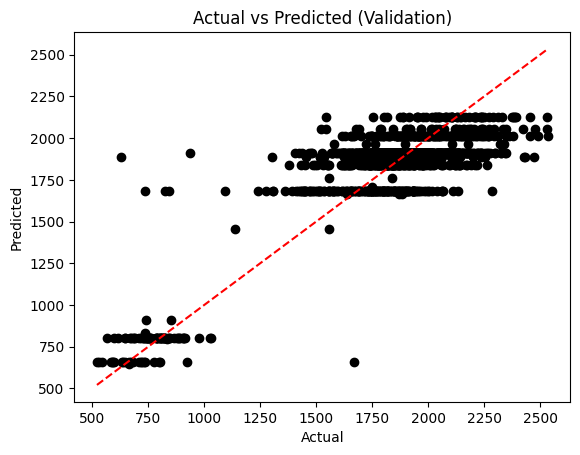

In [22]:

plt.scatter(y_val, y_val_pred, color='black')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Validation)")
plt.show()

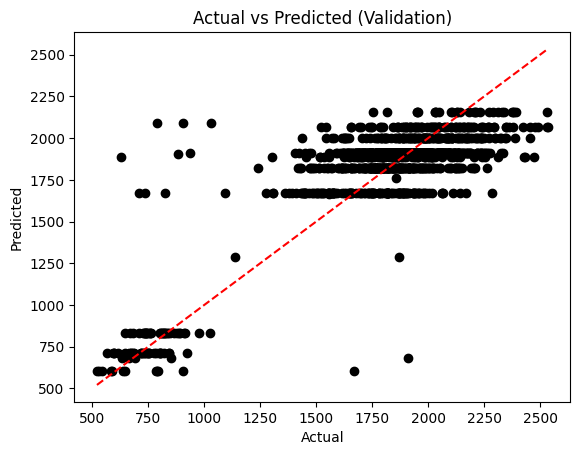

In [20]:

plt.scatter(y_val, y_val_pred, color='black')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Validation)")
plt.show()

In [27]:
# random Forest (selected features)

from sklearn.ensemble import RandomForestRegressor

X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

# Evaluate
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Print
print("Random Forest with Selected Features")
print("Training R²:", round(r2_train, 4))
print("Training RMSE:", round(rmse_train, 4))
print("Validation R²:", round(r2_val, 4))
print("Validation RMSE:", round(rmse_val, 4))

Random Forest with Selected Features
Training R²: 0.9138
Training RMSE: 102.0314
Validation R²: 0.8009
Validation RMSE: 153.3725


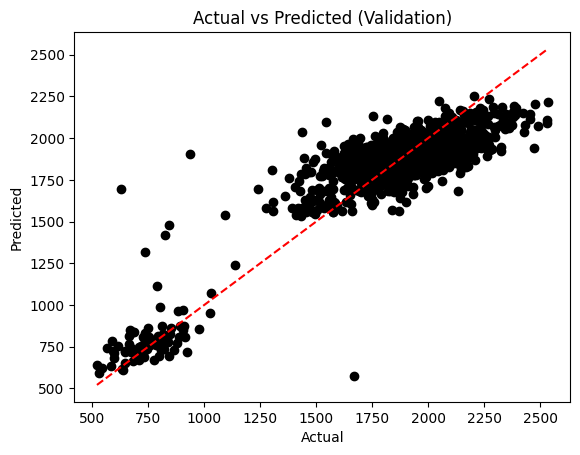

In [28]:
plt.scatter(y_val, y_val_pred, color='black')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Validation)")
plt.show()

In [25]:
# Random forest

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

# Evaluate
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Print
print("Random Forest with All Features")
print("Training R²:", round(r2_train, 4))
print("Training RMSE:", round(rmse_train, 4))
print("Validation R²:", round(r2_val, 4))
print("Validation RMSE:", round(rmse_val, 4))

Random Forest with All Features
Training R²: 0.9201
Training RMSE: 98.1996
Validation R²: 0.8091
Validation RMSE: 150.2116


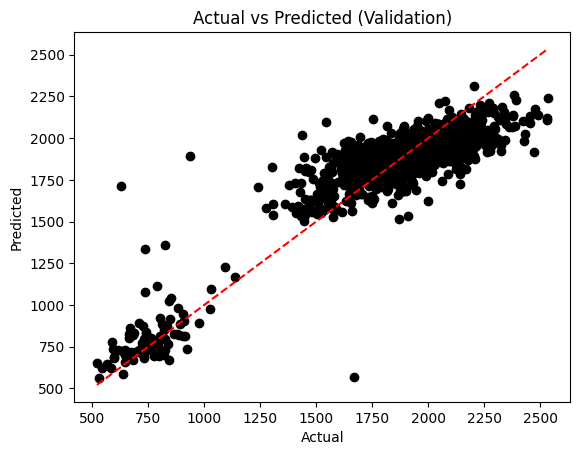

In [26]:
plt.scatter(y_val, y_val_pred, color='black')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Validation)")
plt.show()